In [ ]:
import numpy as np
%pylab inline  
import GPy
import GPyOpt
import matplotlib.pyplot as plt

### Baye_Opt
This notebook is mostly to explain the uses of bayesian optimization
- demonstartes the application of GPyOpt
- generate a simple optimizer, that outperforms gridsearch & randomsearch


The main theory of bayesian optimization is written extensively here:
- https://arxiv.org/pdf/1012.2599.pdf

This notebook is built off of, and uses code from:
- https://github.com/fmfn/BayesianOptimization
- https://github.com/thuijskens/bayesian-optimization
- https://sheffieldml.github.io/GPyOpt/

### 1-D function

In short the process suggests that we want to find the where $f(x)$ is greatest in for the **eg_function**: 

$$f(x) = e^{-(x - 2)^2} + e^{-{(x - 6)^2}/{10}} + {1/{(x^2 + 1)}}$$

In [2]:
def eg_function(x): return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/(x**2 + 1)

In [ ]:
def eg_function(x): 
    return np.sin(-(x-3)) - (x**2)/10 + 100

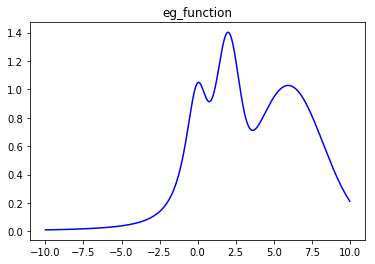

In [3]:
x = np.linspace(-10, 10, 10000).reshape(-1, 1)
y = eg_function(x)
plt.title('eg_function')
plt.plot(x, y, c='b');


- **Gridsearching** would search the param space symetrically and systematically.
    - thorough, inefficient, uniformity between samples may miss details 
- **Randomsearching** would search the param space randomly. 
    - efficient, less thorough, reliant on sufficent iterations
- *but neither learn from previously selected elements in the parameter space.*

- **Bayesian** however, does learn from previous elements, making 

In [4]:
#the upper and lower bounds seem to be -2:10 so we shall use that
grid_params = [np.linspace(-10,10,15)]   #10 equidistant values with bounds of param space  

rand_params = [np.linspace(-10,10,1000)] #1000 equidistant values with bounds of param space 
rand_iter   = 15                            #from which only 10 will be sampled

bay_params  = [{'name': 'var_1',  
               'type': 'continuous',    #1 continuous variable within bounds of param space
                'domain': (-10,10)}]
bay_iter    = 15                            #from which only 10 will be sampled

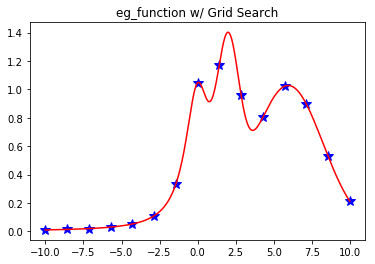

In [5]:
plt.title('eg_function w/ Grid Search')
for i in grid_params:
    plt.plot(i,eg_function(i),'*', markersize=10,c='b')
plt.plot(x, y,c='r');

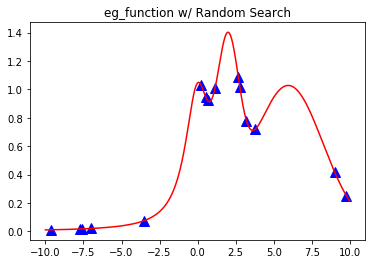

In [6]:
plt.title('eg_function w/ Random Search')
for i in range(rand_iter):
    v = np.random.choice(rand_params[0])
    plt.plot(v,eg_function(v),'^', markersize=10,c='b')
plt.plot(x, y,c='r');

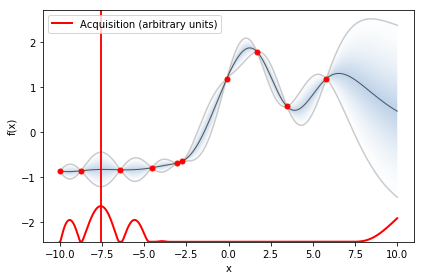

In [7]:
bay = GPyOpt.methods.BayesianOptimization(eg_function,
                                          bay_params,
                                          acquisition_type='EI',
                                         de_duplication=True)

bay.run_optimization(bay_iter-10) #GPyOpt uses 5 points + the number listed
bay.plot_acquisition()

In [ ]:
bay.run_optimization(1)
bay.plot_acquisition()

In [ ]:
bay.run_optimization(1)
bay.plot_acquisition()

In [ ]:
bay.run_optimization(1)
bay.plot_acquisition()

In [ ]:
bay.run_optimization(1)
bay.plot_acquisition()

In [ ]:
bay.run_optimization(10)
bay.plot_acquisition()

plt.title('True Function')
plt.plot(x, y,c='r')
print("By 15 acquistions the optimizer's interpretation of the function resembles the true function")

In [ ]:
bay.x_opt

### 2-D model
In short the process suggests that we want to find the where $f(x)$ is greatest in for the **six_hump** equation: 
$$f(x_1,x_2) = \left(4-2.1x_1^2 + \frac{x_1^4}{3} \right)x_1^2 + x_1x_2 + (-4 +4x_2^2)x_2^2,$$

In [ ]:
def six_hump(x1,x2):
#    x1 = x[0]
#    x2 = x[1]
    return (4 - 2.1*(x1**2) + (x1**4)/3.0)*(x1**2) + x1*x2 + (-4 + 4*(x2**2))*(x2**2)

In [ ]:
space = [x1 for x1 in np.linspace(-2,2,15)],[x2 for x2 in np.linspace(-1,1,15)]

In [ ]:
camel = [[six_hump(x1,x2) for x1 in space[0]] for x2 in space[1]]

In [ ]:
six_hump(2,3)

In [ ]:
plt.imshow(camel, cmap='hot')
plt.show()

### Why we use it

In [ ]:
%pylab inline 
import numpy as np
import GPyOpt
import GPy
from GPyOpt.experiment_design import initial_design
import matplotlib.pyplot as plt

In [ ]:
func  = GPyOpt.objective_examples.experimentsNd.alpine1(input_dim=2) 

mixed_domain =[{'name': 'var1_2', 'type': 'continuous', 'domain': (-10,10),'dimensionality': 1},
               {'name': 'var5', 'type': 'continuous', 'domain': (-1,5)}]

space = GPyOpt.Design_space(mixed_domain)
data_init = 500

In [ ]:
### --- Grid design
X = initial_design('grid',space,data_init)
plt.plot(X[:,0],X[:,1],'b.')
plt.title('Grid design')

In [ ]:
### --- Random initial design
X = initial_design('random',space,data_init)
plt.plot(X[:,0],X[:,1],'b.')
plt.title('Random design')